In [1]:
import pandas as pd

In [3]:
pwd()

'/glade/u/home/hkashgar/GPU_data_analysis_rapids/smalltests'

In [34]:
csv = pd.read_csv("../geocat-comp/relhum_ported_test.csv")

In [36]:
csv

,Routine,Input,Approach,ArraySize,iteration,Runtime(s)
0,Relhum,NumPy input,numpy,10,1,0.000291
1,Relhum,NumPy input,numpy,10,2,0.000068
2,Relhum,NumPy input,numpy,10,3,0.000062
3,Relhum,NumPy input,numpy,10,4,0.000059
4,Relhum,NumPy input,numpy,10,5,0.000058
...,...,...,...,...,...,...
375,Relhum,Xarray with Dask array input,cupy,100000,6,15.673182
376,Relhum,Xarray with Dask array input,cupy,100000,7,15.832512
377,Relhum,Xarray with Dask array input,cupy,100000,8,15.651232
378,Relhum,Xarray with Dask array input,cupy,100000,9,15.802431


In [37]:
np.unique(csv['Input'])

array(['NumPy input', 'Xarray with Dask array input',
       'Xarray with NumPy input'], dtype=object)

In [30]:
import matplotlib.pyplot as plt
import numpy as np

def plot(allData,name):
    arraysizes = np.unique(allData['ArraySize'])
    sd_numpy = np.zeros(len(arraysizes))
    sd_cupy = np.zeros(len(arraysizes))
    y_numpy = np.zeros(len(arraysizes))
    y_cupy = np.zeros(len(arraysizes))
    plt.rcParams.update({'font.size': 16})
    for i in range(0,len(arraysizes)):
        cupydata = allData.loc[(allData['ArraySize'] == arraysizes[i]) & (allData['Approach'] == 'cupy')]
        numpydata = allData.loc[(allData['ArraySize'] == arraysizes[i]) & (allData['Approach'] == 'numpy')]
        y_cupy[i] = np.mean(cupydata['Runtime(s)'])
        y_numpy[i] = np.mean(numpydata['Runtime(s)'])
        sd_cupy[i] = np.std(cupydata['Runtime(s)'])
        sd_numpy[i] = np.std(numpydata['Runtime(s)'])
    fig, ax = plt.subplots(figsize=(9, 6))
    ax.errorbar(arraysizes, y_numpy, yerr=sd_numpy, fmt='-o')
    ax.errorbar(arraysizes, y_cupy, yerr=sd_cupy, fmt='-o')
    ax.plot(arraysizes, y_numpy, label='numpy',color="steelblue")
    ax.plot(arraysizes, y_cupy, label='cupy',color="darkorange")  # Plot more data on the axes...
    ax.legend();  # Add a legend.
    ax.set_xlabel('ArraySize')  # Add an x-label to the axes.
    ax.set_ylabel('Runtime(s)')  # Add a y-label to the axes.
    ax.set_title(("Test_relhum"))
    ax.set_xscale('log')
    ax.set_yscale('log')
    plt.savefig(name,dpi=fig.dpi)

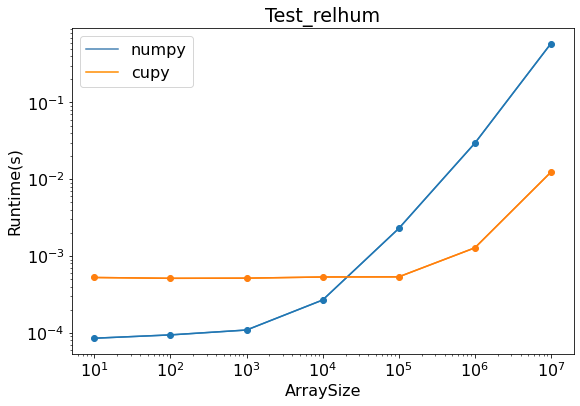

In [31]:
plot(csv,"Test_relhum.jpg")